# Quantum Amplitude Estimation (QAE) Algorithms

In [1]:
from src.algorithms.QAE_emulator import TestQAE
from src.algorithms.classicalAE import testCAE
from src.algorithms.BAE_testing import TestBAE
from src.algorithms.IQAE import TestIQAE
from src.algorithms.MLQAE import TestMLQAE
from src.algorithms.FQAE import TestFQAE
from src.algorithms.QAES import TestQAES
from src.algorithms.SQAE import TestSQAE

## Mehtods

Each QAE algorithm is tested by running it several times and plotting the root
mean squared error and the median error as functions of the numbers of queries,
and printing the approximate parameters for a linear fit (in the logspace).

The amplitude and the coherence time can be either numbers or tuples. In the 
latter case, their values are picked at random for each run from the range 
indicated by the tuple. A coherence time of None means the absence of 
decoherence.

These 2 parameters are common to algorithms. Each algorithm requires specific 
additional parameters, which are specified in the 
corresponding cells.

In [2]:
a = (0,1)  
Tc = None
nruns = 10

## Canonical QAE

> Will test 10 runs of 'canonical QAE'.
> Testing 10 runs of QAE with 2 aux qubits...
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> Testing 10 runs of QAE with 4 aux qubits...
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> Testing 10 runs of QAE with 6 aux qubits...
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> Testing 10 runs of QAE with 8 aux qubits...
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> Testing 10 runs of QAE with 10 aux qubits...
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> Testing 10 runs of QAE with 12 aux qubits...
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> Canonical root mean squared error (normalized) = O(Nq^-1.25); offset = 7.48.


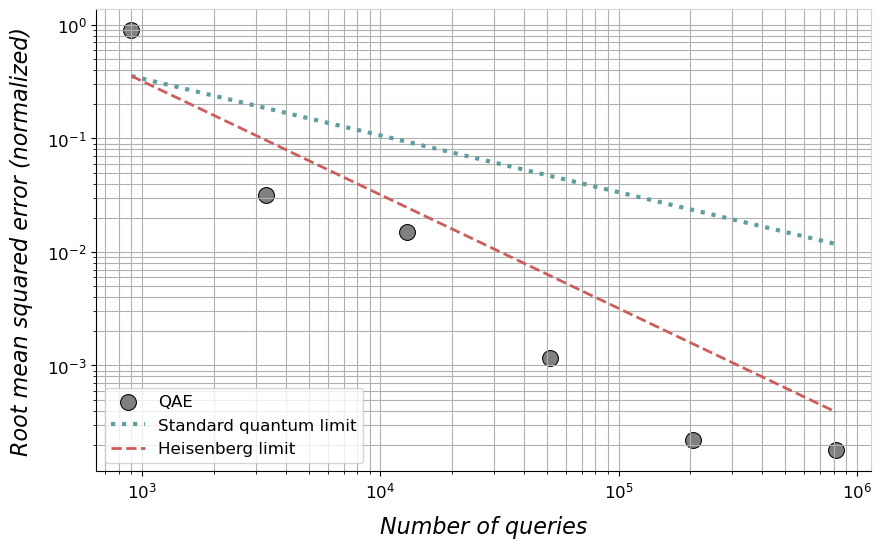

> Canonical median error (normalized) = O(Nq^-1.31); offset = 6.75.


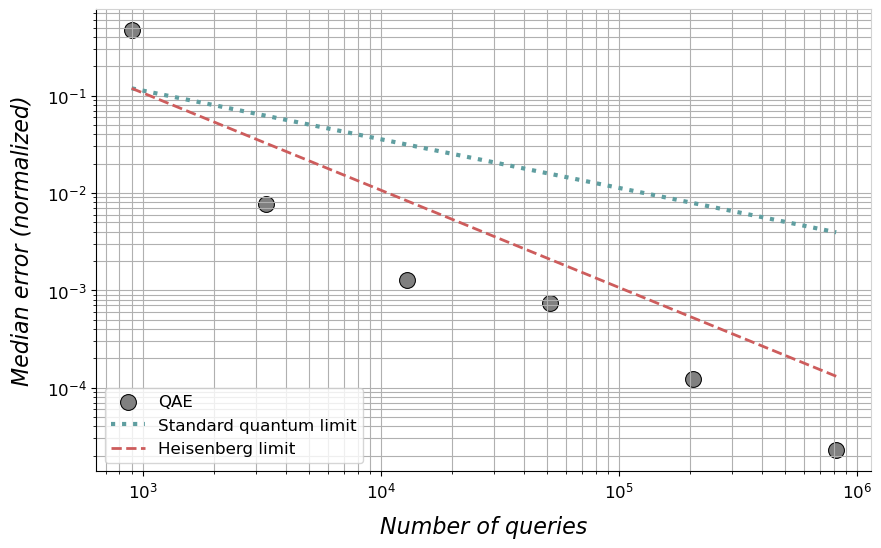

In [3]:
mmin = 2
Nq_target = 10**6
nshots = 100
tester = TestQAE(a, mmin, nshots, silent = True)
tester.sqe_evolution_multiple(mmin, Nq_target, nruns, MLE = True, save = False)

## Classical AE

> Will test 10 runs of 'classical AE'.
> Classical root mean squared error (normalized) = O(Nq^-0.56); offset = 1.29.


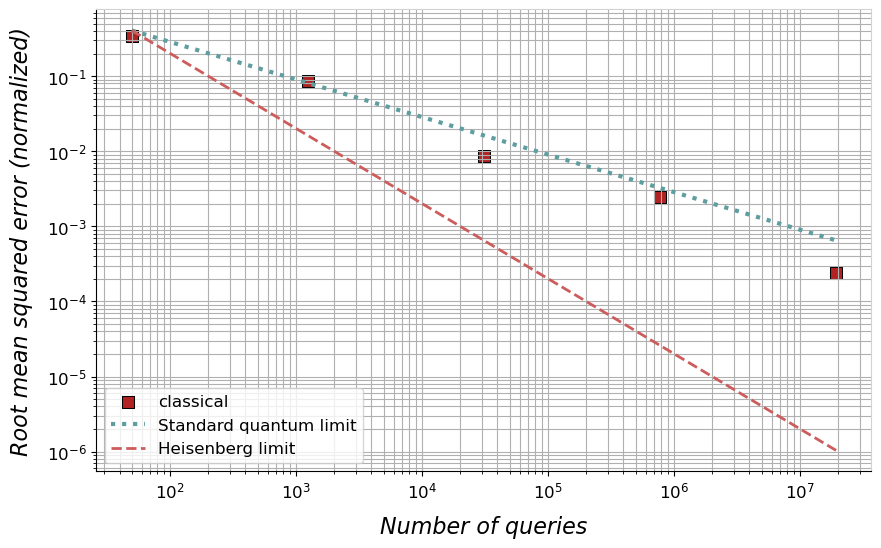

> Classical median error (normalized) = O(Nq^-0.52); offset = 0.14.


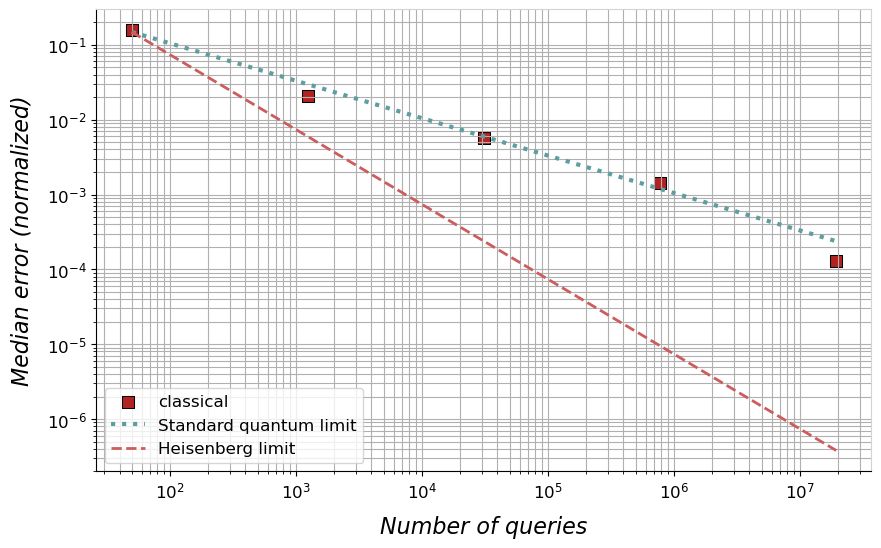

In [4]:
Nq_start = 5*10**1
Nq_target = 10**8
test = testCAE(a, silent = True)
test.sqe_evolution_multiple(Nq_start, Nq_target, nruns, save = False)

## Bayesian QAE (BAE)

> Will test 10 runs of 'Bayesian QAE'.
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> Bae root mean squared error (normalized) = O(Nq^-1.13); offset = 2.75.


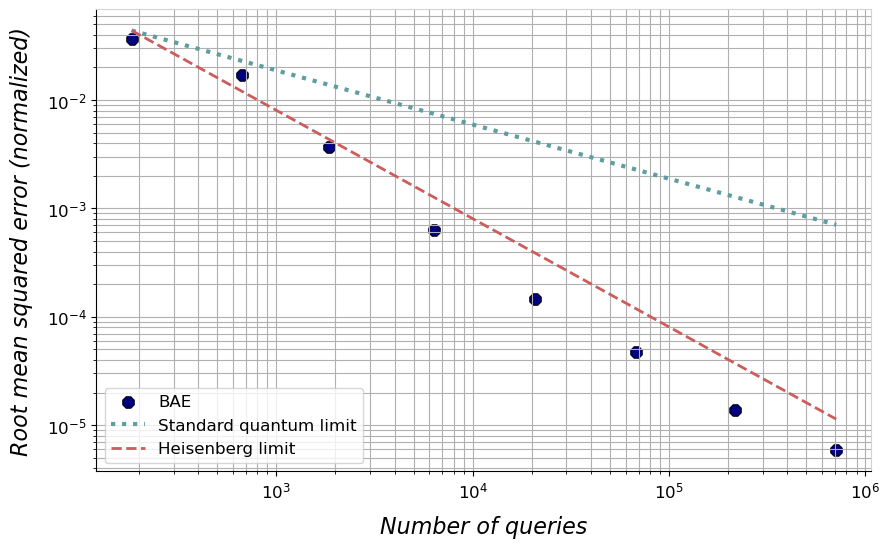

> Bae mean standard deviation (normalized) = O(Nq^-1.07); offset = 2.62.


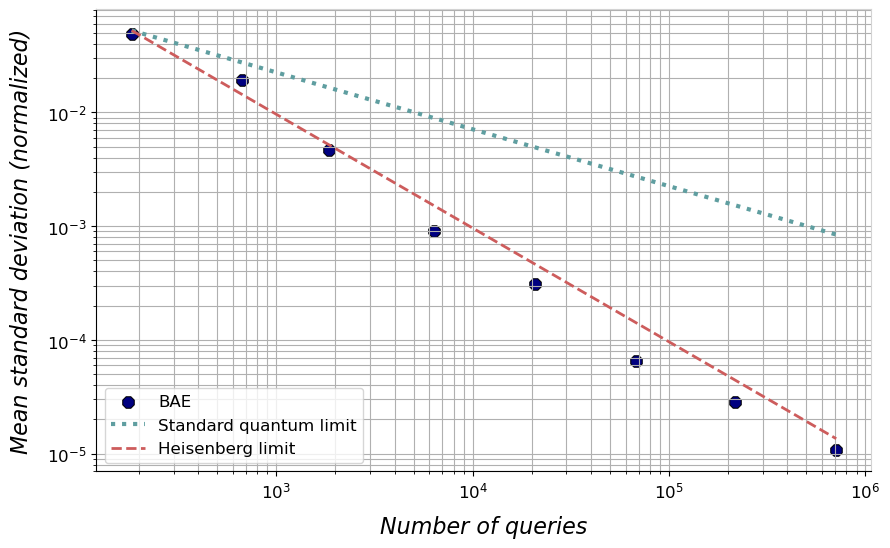

> Bae median error (normalized) = O(Nq^-1.07); offset = 1.35.


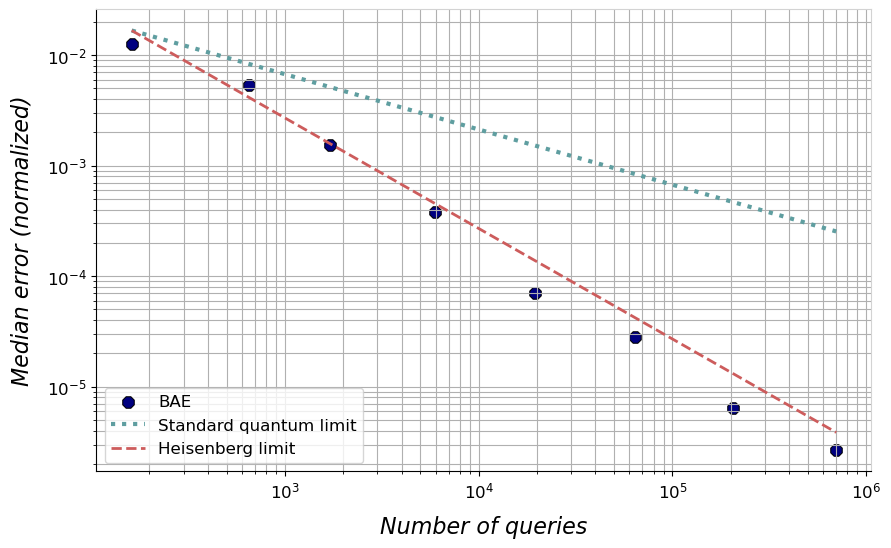

> Bae median standard deviation (normalized) = O(Nq^-1.09); offset = 2.36.


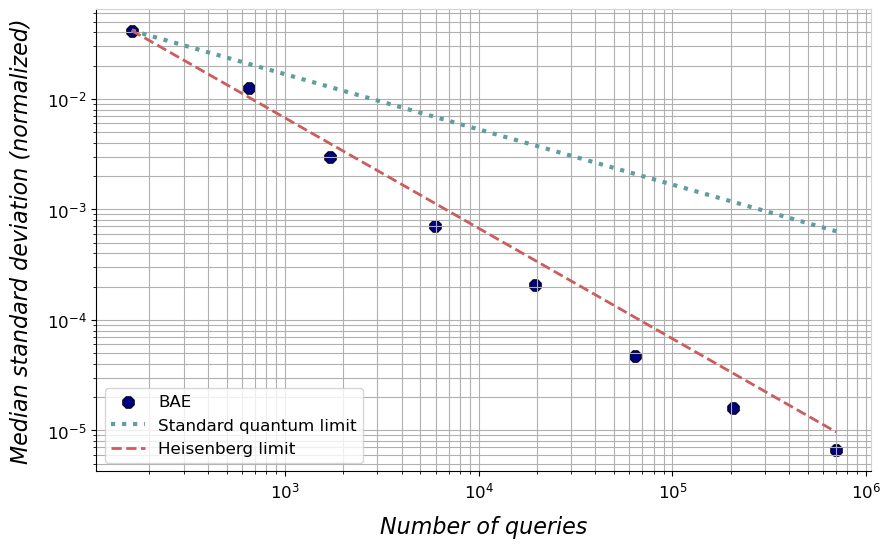

In [12]:
Nq_target = 10**6

# Strategy for dealing with decoherence.
Tc_opts = {"Tc": Tc,
            "Tc_precalc": True if Tc else False,
            "known_Tc": False,
            "range": Tc}

# Strategy for the adaptive optimization.
strat = {"wNs": 100,
            "Ns": 1,
            "TNs": 500,
            "k": 1,
            "Nevals": 50,
            "erefs": 3,
            "ethr": 3,
            "cap": False,
            "capk": 2}

# Sampler arguments.
sampler_str = 'RWM'
sampler_kwargs = {"Npart": 2000,
                    "thr": 0.5,
                    "var": "theta",
                    "ut": "var",
                    "c": 2.38,
                    "log": True,
                    "res_ut": False,
                    "plot": False}

tester = TestBAE(a, Tc_opts, strat, Nq_target, sampler_str, sampler_kwargs, 
                 silent = True, save = False)
tester.sqe_evolution_multiple(nruns, redirect = 2)

## Iterative QAE (IAE)

> Will test 10 runs of 'Iterative QAE'.
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> Iqae - chernoff root mean squared error (normalized) = O(Nq^-1.14); offset = 5.39.


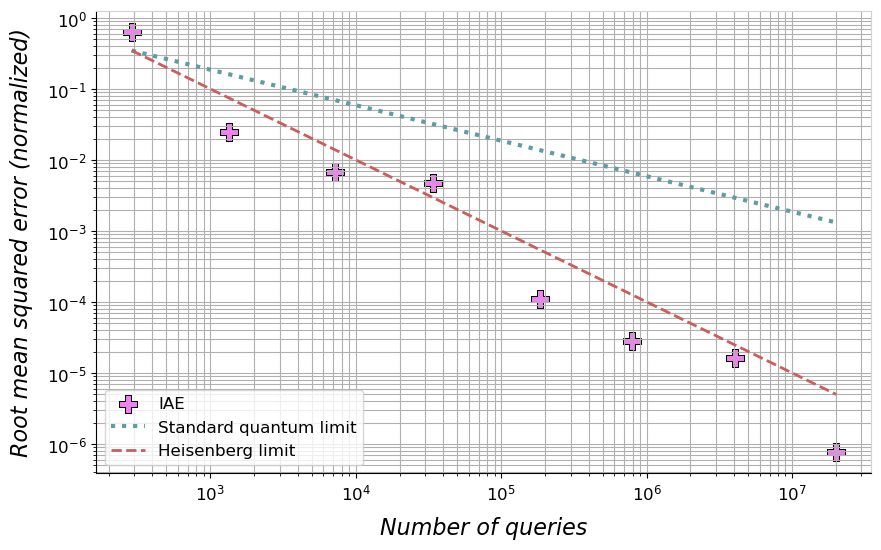

> Iqae - chernoff median error (normalized) = O(Nq^-1.07); offset = 2.89.


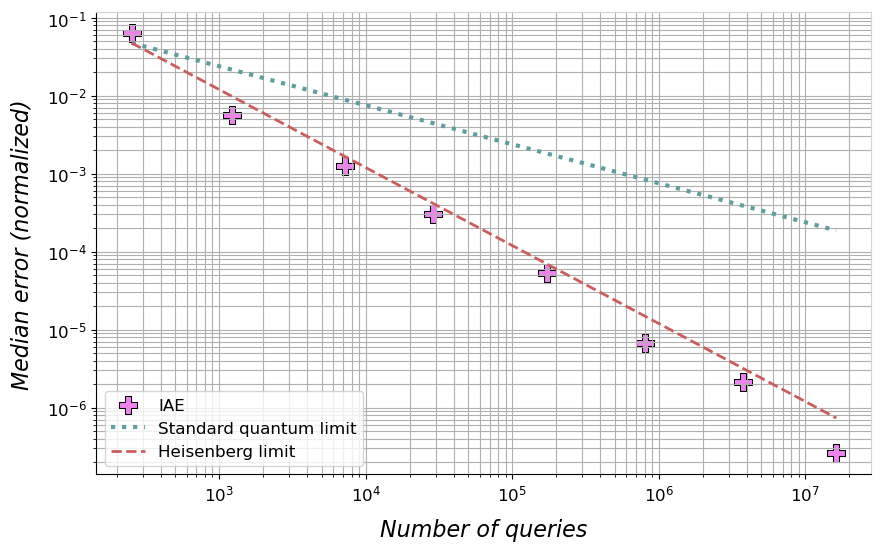

In [6]:
alpha = 0.05
nshots = 100
ci = "chernoff"
modified = False
eps_start, eps_end = 1e-1, 4e-7
tester = TestIQAE(a, Tc, nshots, alpha, modified, ci, silent = True)
tester.sqe_evolution_multiple(nruns, eps_start, eps_end, save = False)

## Maximum Likelihood IQAE (MLAE)

> Will test 10 runs of 'Maximum Likelihood QAE'  (EIS, LIS).
             MLQAE error plot averaged (EIS/LIS)              
                      a=(0, 1) | Tc=None                      
        runs = 10 | nshots = 100 | Nq_target = 10^6.0         
> Will test a EIS strategy using 13 circuits (~10^5.9 queries). [rmse_evolution]
|0%|10%|> Warning: divide(s) by zero encountered. Probably a log(0) in a loglikelihood somewhere for a parameter with 0 probability. I will not warn again about the same issue. [single_warning]
20%|30%|40%|50%|60%|70%|80%|90%|100%|
> Will test a LIS strategy using 91 circuits (~10^5.9 queries). [rmse_evolution]
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> File 'MLQAE_041224_1919_a=rand[0,1];Tc=None,nruns=10(EIS);10(LIS),nshots=100,Nq_cumul≈10^5.9#0.data' has been saved.
> Lis root mean squared error (normalized) = O(Nq^-0.81); offset = 2.05.
> Eis root mean squared error (normalized) = O(Nq^-0.94); offset = 1.97.
> Saved figure 'EIS_LIS_est_evol_04_12_2024_1

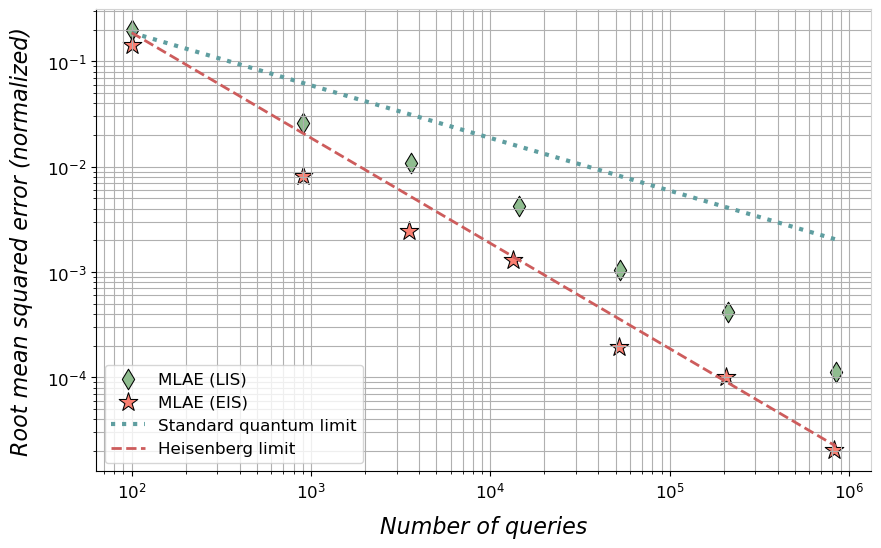

> Lis median error (normalized) = O(Nq^-0.8); offset = 1.46.
> Eis median error (normalized) = O(Nq^-0.94); offset = 1.23.
> Saved figure 'EIS_LIS_est_evol_04_12_2024_19_19(1).png'.


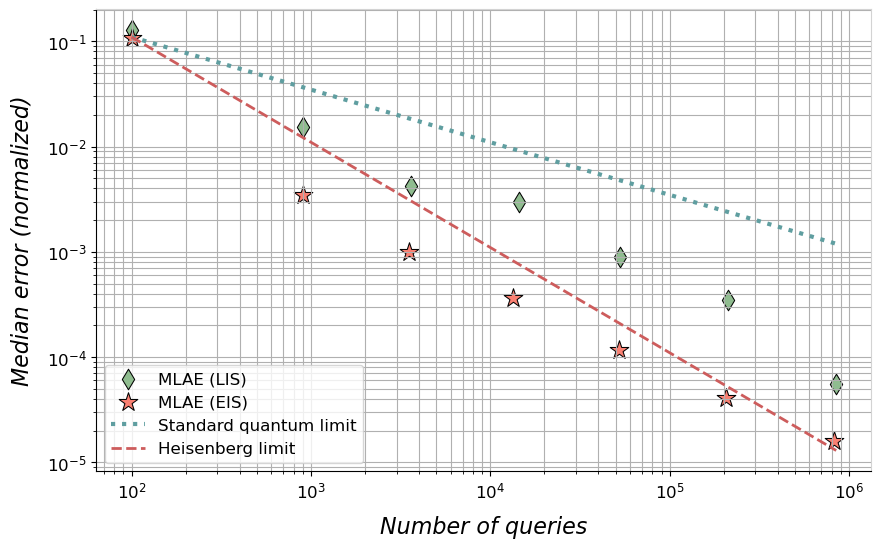

In [ ]:
nshots = 100
Nq_target = 10**6
seqs = ["EIS", "LIS"]
Nq_calc = "cumul"
tester = TestMLQAE(a, Tc, nshots, Nq_calc = Nq_calc, silent = True)
tester.sqe_evolution_multiple(nruns, Nq_target, seqs, save = True)

## Faster QAE (FAE)

> Will test 10 runs of 'Faster QAE'.
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> Fqae root mean squared error (normalized) = O(Nq^-0.39); offset = 3.93.


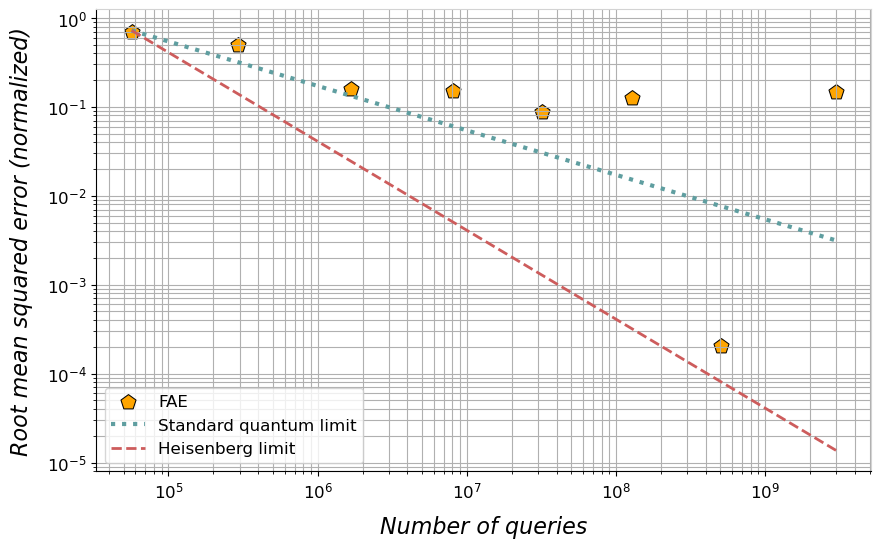

> Fqae median error (normalized) = O(Nq^-0.97); offset = 10.71.


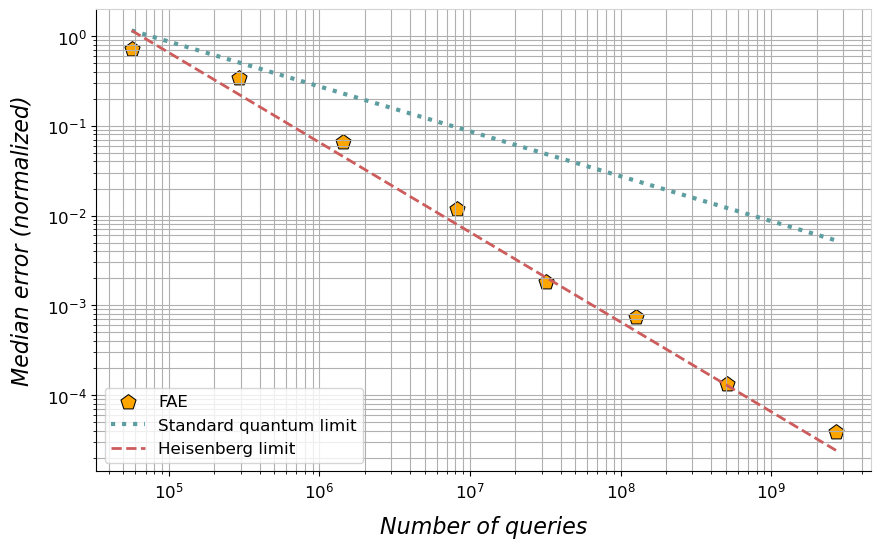

In [8]:
delta_c = 0.01
kmax_start, kmax_end = 1, 18
tester = TestFQAE(a, Tc, delta_c, silent = True)
tester.sqe_evolution_multiple(nruns, kmax_start, kmax_end, save = False)

## QAE, simplified (QAES)

> Will test 10 runs of 'QAE, simplified'.
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> Qaes root mean squared error (normalized) = O(Nq^-0.45); offset = 3.54.


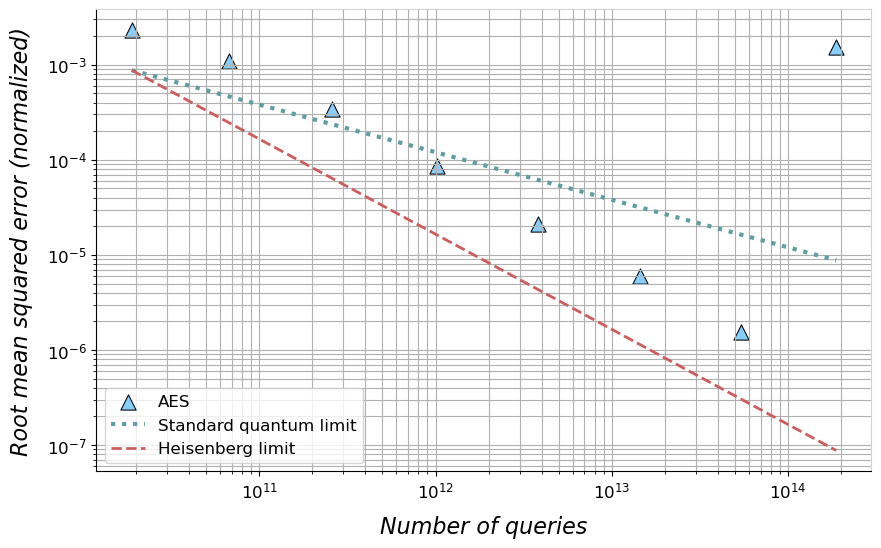

> Qaes median error (normalized) = O(Nq^-0.95); offset = 16.14.


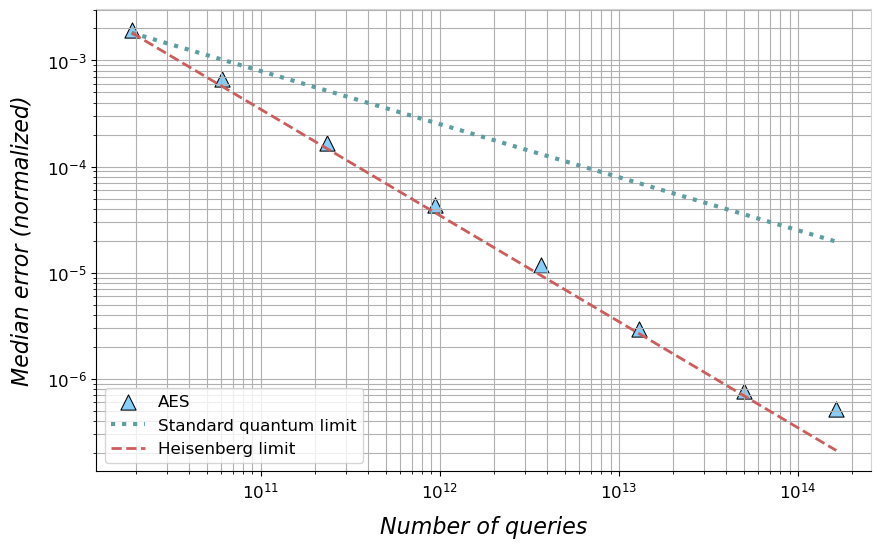

In [9]:
epsmax = 1e-2
epsmin = 1e-6
alpha = 0.05
tester = TestQAES(a, Tc,  alpha, silent = True)
tester.sqe_evolution_multiple(nruns, epsmin, epsmax, save = False)

## Simpler QAE (SQAE)

> Will test 10 runs of 'Simpler QAE'.
|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
> Sqae #2 root mean squared error (normalized) = O(Nq^-0.52); offset = 1.36.


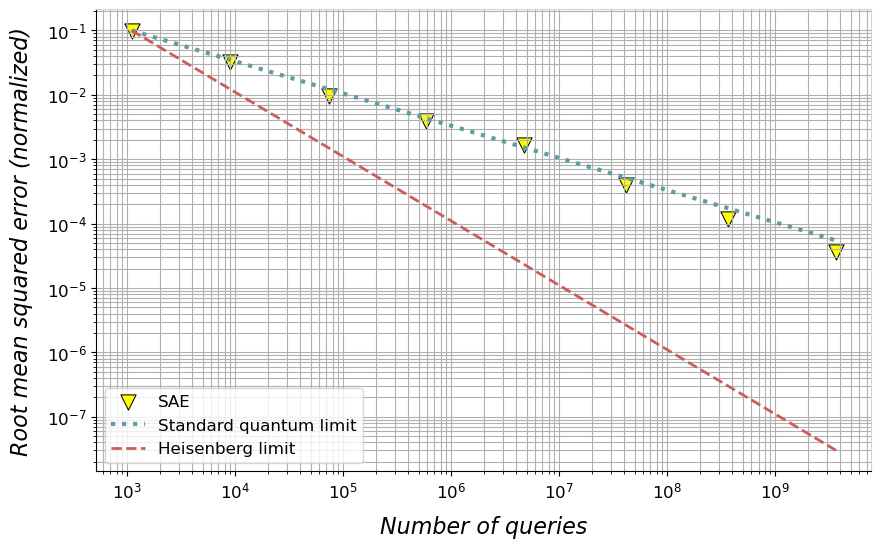

> Sqae #2 median error (normalized) = O(Nq^-0.53); offset = 0.52.


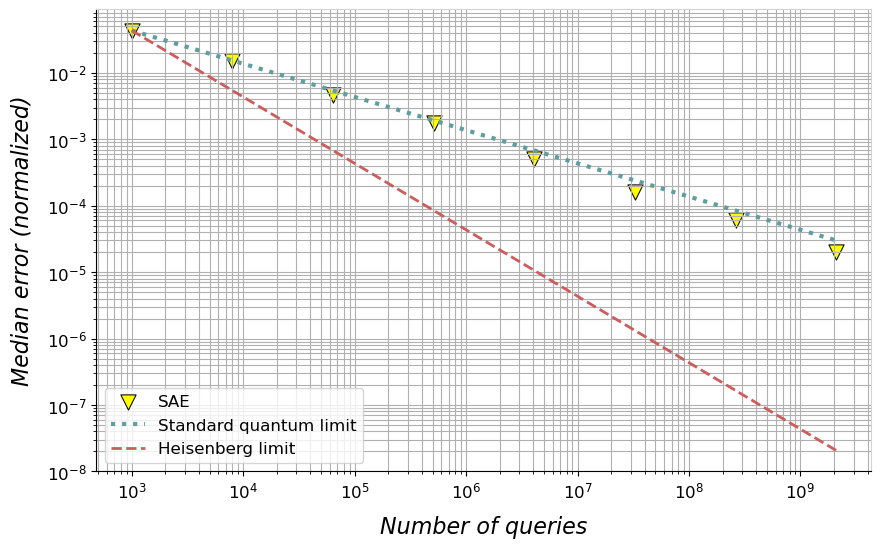

In [10]:
nshots = 100
formula = 2
threshold = 0.5
Nq_start = 500
Nq_target = 10**10
tester = TestSQAE(a, Tc, nshots, formula, threshold, silent = True)
tester.sqe_evolution_multiple(nruns, Nq_start, Nq_target, save = False)  